In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from matplotlib import rcParams
from matplotlib import font_manager as fm
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [23]:
import os
from catrace.publish_data import read_dataframe_from_h5

publish_data_dir = '../../publish_dataset/Hu_Temiz_et_al_dataset'
behavior_timecourse_file = os.path.join(publish_data_dir, 'juvenile_zebrafish_dataset/behavior/juvenile_behavior_timecourse.h5')
behavior_timecourse_df = read_dataframe_from_h5(behavior_timecourse_file)
# behavior_timecourse_df has column index with level 'trial'.
# Convert the type of trial level from string to integer
behavior_timecourse_df.columns = behavior_timecourse_df.columns.set_levels(
    behavior_timecourse_df.columns.levels[behavior_timecourse_df.columns.names.index('trial')].astype(int),
    level='trial'
)

In [ ]:
from catrace.dataset import load_dataset_config
config_file = '../dataset_configs/juvenile_dataset.json'
dsconfig = load_dataset_config(config_file)

In [25]:
import pandas as pd

zetadf = behavior_timecourse_df.xs('CombinedZeta', level='behavior_param')
num_trial_per_day = 9
trial_numbers = zetadf.columns.get_level_values('trial') - 1
days = (trial_numbers // num_trial_per_day) + 1
new_columns = pd.MultiIndex.from_arrays(
    [days, trial_numbers],
    names=['day', 'trial']
)
zetadf.columns = new_columns
zetadf_day = zetadf.groupby(level='day', axis=1).mean()
print(zetadf_day)


day                                     1         2         3         4
cs       fish_id                                                       
cs_minus 2021-02-05-DpOBEM-JH9  -0.526139 -0.296733 -0.494598  0.058892
         2021-03-18-DpOBEM-JH10 -1.264247 -1.055822 -1.348509       NaN
         2021-03-19-DpOBEM-JH10 -0.760081 -0.241481 -0.446149 -0.695344
         2021-04-02-DpOBEM-JH11 -0.243979 -0.314875  0.138045       NaN
         2021-04-03-DpOBEM-JH11 -0.442904 -0.482958 -1.290520 -0.374489
         2021-05-01-DpOBEM-JH13 -0.626156 -0.255863 -0.246103 -0.910765
         2021-05-22-DpOBEM-JH14 -1.044742 -1.132635 -0.584109 -1.372336
         2021-07-30-DpOBEM-JH17  0.049845 -0.211353  0.079986 -0.564356
         2021-07-31-DpOBEM-JH17 -0.674421 -0.360719 -0.624288 -1.213075
         2021-09-02-DpOBEM-JH18 -1.350467 -2.029637 -2.030037       NaN
         2021-09-03-DpOBEM-JH18 -1.199342 -1.640611 -1.283507 -2.278841
         2021-09-04-DpOBEM-JH18 -1.020358 -1.163711 -1.318886 -1

/tmp/ipykernel_4184675/396583422.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  zetadf_day = zetadf.groupby(level='day', axis=1).mean()


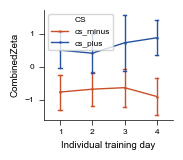

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# zetadf_day
# Columns: each day (e.g., 1, 2, 3, ...)
# Rows: MultiIndex with levels 'cs' and 'fish_id'

# Restructure the dataframe
df_long = zetadf_day.reset_index()
df_melted = df_long.melt(id_vars=['cs', 'fish_id'], 
                         var_name='day', 
                         value_name='zeta')
df_melted['day'] = pd.to_numeric(df_melted['day'])

# Define plot parameters
order = sorted(df_melted['day'].unique())
lw = 1
markersize = 1
capsize = 0.1
errorbar = 'sd'  # or 'ci'
errwidth = 1

fig, ax = plt.subplots(figsize=(2, 1.7))

# Plot
sns.pointplot(
    data=df_melted,
    x='day',
    y='zeta',
    hue='cs',
    order=order,
    linewidth=lw,
    markersize=markersize,
    capsize=capsize,
    errorbar=errorbar,
    err_kws={'linewidth': errwidth},
    palette={'cs_plus':'#2552A3', 'cs_minus':'#CB4F27'}
)

label_fontsize = 7
legend_fontsize = 6
tick_fontsize = 6
ax.set_xlabel('Individual training day', fontsize=label_fontsize)
ax.set_ylabel('CombinedZeta', fontsize=label_fontsize)
ax.legend(title='CS', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

fig.tight_layout()
sns.despine()